## Kandinsky GAN 

Generate artworks based on an opus of 346 Kandinsky paintings

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from urllib.request import urlopen
from IPython.display import Image
from bs4 import BeautifulSoup
import requests
from tqdm import tqdm
import cv2
import os
import gc

%matplotlib inline

In [3]:
ua = {"User-Agent":"Mozilla/5.0"}

In [30]:
url = 'http://www.artnet.com/artists/wassily-kandinsky/2?type=paintings'

In [32]:
page = requests.get(url, headers = ua)
soup = BeautifulSoup(page.text, 'lxml')

In [33]:
soup.title

<title>Wassily Kandinsky | artnet | Page 2</title>

In [15]:
cards = soup.find_all('li', {'class': 'gallerybox'})

In [34]:
imgs = soup.find_all('img')

In [39]:
imgs[2]['src']

'http://www.artnet.com/WebServices/images/ll00108lldV8QJFgVeECfDrCWQFHPKcntDF/wassily-kandinsky-unfester-ausgleich-(unstable-compensation).jpg'

The pagination of the website is in the form:

In [45]:
for i in range(1,16):
    print('http://www.artnet.com/artists/wassily-kandinsky/{}?type=paintings'.format(i))

http://www.artnet.com/artists/wassily-kandinsky/1?type=paintings
http://www.artnet.com/artists/wassily-kandinsky/2?type=paintings
http://www.artnet.com/artists/wassily-kandinsky/3?type=paintings
http://www.artnet.com/artists/wassily-kandinsky/4?type=paintings
http://www.artnet.com/artists/wassily-kandinsky/5?type=paintings
http://www.artnet.com/artists/wassily-kandinsky/6?type=paintings
http://www.artnet.com/artists/wassily-kandinsky/7?type=paintings
http://www.artnet.com/artists/wassily-kandinsky/8?type=paintings
http://www.artnet.com/artists/wassily-kandinsky/9?type=paintings
http://www.artnet.com/artists/wassily-kandinsky/10?type=paintings
http://www.artnet.com/artists/wassily-kandinsky/11?type=paintings
http://www.artnet.com/artists/wassily-kandinsky/12?type=paintings
http://www.artnet.com/artists/wassily-kandinsky/13?type=paintings
http://www.artnet.com/artists/wassily-kandinsky/14?type=paintings
http://www.artnet.com/artists/wassily-kandinsky/15?type=paintings


Get images

In [47]:
art_urls = []
for i in tqdm(range(1, 16)):
    url = 'http://www.artnet.com/artists/wassily-kandinsky/{}?type=paintings'.format(i)
    
    # Get text
    page = requests.get(url, headers = ua)
    soup = BeautifulSoup(page.text, 'lxml')
    
    # Get image urls
    imgs = soup.find_all('img')
    for img in imgs:
        art_urls.append(img['src'])

100%|██████████| 15/15 [00:14<00:00,  1.11s/it]


In [48]:
art_urls

['http://www.artnet.com/WebServices/images/ll00128lldXKbJFgMUECfDrCWQFHPKcC4qF/wassily-kandinsky-treppe-zum-schloss-(murnau).jpg',
 'http://www.artnet.com/WebServices/images/ll1376790llgetqCfDrCWQFHPKAD/wassily-kandinsky-baumblüte-in-lana-ii.jpg',
 'http://www.artnet.com/WebServices/images/ll1237995llgRbfDrCWQFHPKAD/wassily-kandinsky-rapallo---meereslandschaft-mit-dampfer-/-.jpg',
 'http://www.artnet.com/WebServices/images/ll1089070llgX5jR3CfDrCWQFHPKAD/wassily-kandinsky-rapallo-strasse.jpg',
 'http://www.artnet.com/WebServices/images/ll1089067llgX5jR3CfDrCWQFHPKAD/wassily-kandinsky-the-bridge.jpg',
 'http://www.artnet.com/WebServices/images/ll00240lldZGbJFgneECfDrCWQFHPKcm3pF/wassily-kandinsky-kochel—gebirglandschaft-mit-tannen-(kochel—mountains-with-firs).jpg',
 'http://www.artnet.com/WebServices/images/ll00443lldYGbJFgUNECfDrCWQFHPKcFkpF/wassily-kandinsky-kochel—dorfkirche.jpg',
 'http://www.artnet.com/WebServices/images/ll00013lldR9aJFgVeECfDrCWQFHPKcVzmF/wassily-kandinsky-vertieft

Download images and save with numpy

In [49]:
import urllib
import cv2

def url_to_image(url):
    resp = urllib.urlopen(url)
    image = np.asarray(bytearray(resp.read()), dtpye="uint8")
    image = cv2imdecode(image, cv2.IMREAD_COLOR)
    
    return image

In [50]:
import requests
with open('test.jpg', 'wb') as f:
    f.write(requests.get(art_urls[3]).content)

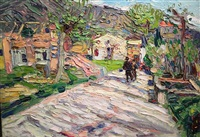

In [52]:
Image(filename='test.jpg')

In [55]:
os.chdir('kandinsky_jpegs/')

In [75]:
for i in tqdm(range(len(art_urls))):
    filename = 'kandinsky{}.jpg'.format(i)
    with open(filename, 'wb') as f:
        f.write(requests.get(art_urls[i]).content)    

100%|██████████| 346/346 [00:26<00:00, 13.87it/s]


In [76]:
len(art_urls)

346

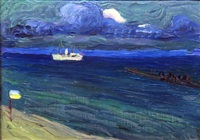

In [84]:
Image(filename='kandinsky2.jpg')

In [87]:
im = cv2.imread("kandinsky10.jpg")

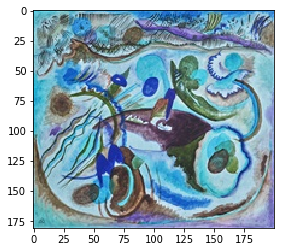

In [88]:
plt.figure()
plt.imshow(im)

In [7]:
os.chdir('kandinsky_jpegs/')

Get rid of files that didn't contain jpegs

100%|██████████| 9/9 [00:00<00:00, 81.06it/s]


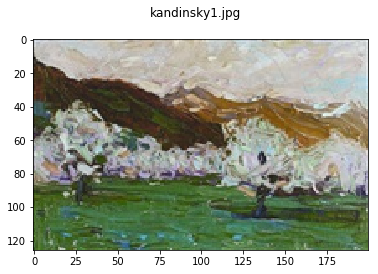

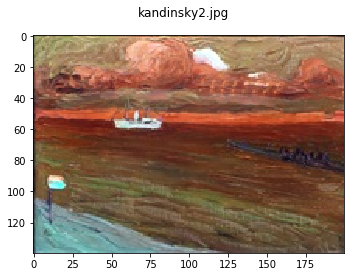

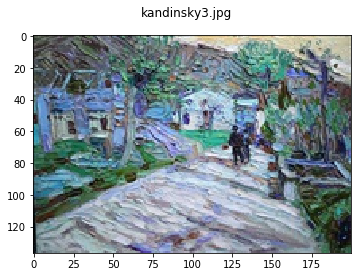

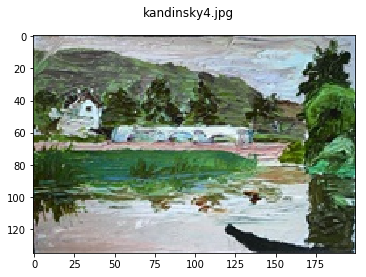

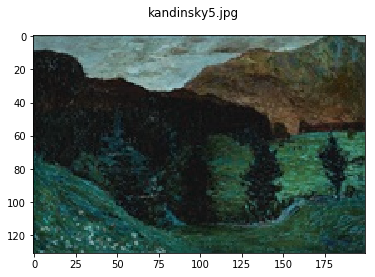

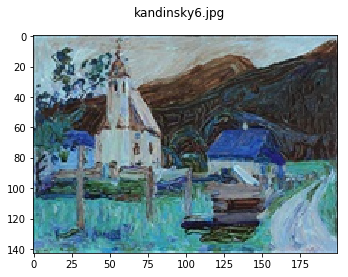

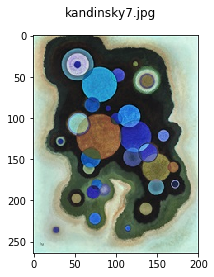

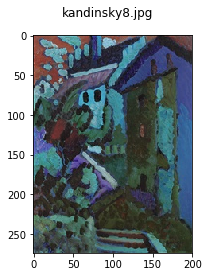

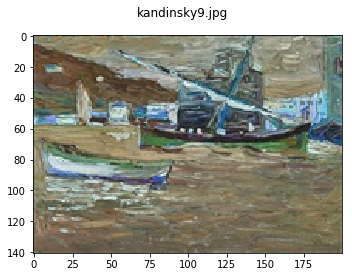

In [19]:
for i in tqdm(range(1,10)):
    
    fn = 'kandinsky{}.jpg'.format(i)
    im = cv2.imread(fn)
    fig = plt.figure()
    fig.suptitle(fn)
    plt.imshow(im)

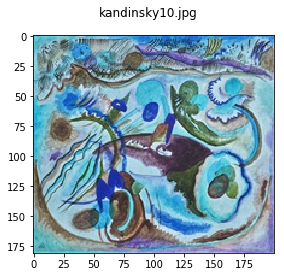

In [13]:
im = cv2.imread('kandinsky10.jpg')
fig = plt.figure()
fig.suptitle('kandinsky10.jpg')
plt.imshow(im)